In [1]:
library(tidyverse)
library(tm)
library(wordcloud)
library(wordcloud2)
library(tidytext)
library(reshape2)
library(radarchart)
library(RWeka)

ep4 <- read.table("SW_EpisodeIV.txt")
ep5 <- read.table("SW_EpisodeV.txt")
ep6 <- read.table("SW_EpisodeVI.txt")


Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats
Loading required package: NLP

Attaching package: 'NLP'

The following object is masked from 'package:ggplot2':

    annotate

Loading required package: RColorBrewer

Attaching package: 'reshape2'

The following object is masked from 'package:tidyr':

    smiths



In [2]:
# Text transformations
cleanCorpus <- function(corpus){
  
  corpus.tmp <- tm_map(corpus, removePunctuation)
  corpus.tmp <- tm_map(corpus.tmp, stripWhitespace)
  corpus.tmp <- tm_map(corpus.tmp, content_transformer(tolower))
  v_stopwords <- c(stopwords("english"), c("thats","weve","hes","theres","ive","im",
                                           "will","can","cant","dont","youve","us",
                                           "youre","youll","theyre","whats","didnt"))
  corpus.tmp <- tm_map(corpus.tmp, removeWords, v_stopwords)
  corpus.tmp <- tm_map(corpus.tmp, removeNumbers)
  return(corpus.tmp)
  
}

In [3]:
# Most frequent terms 
frequentTerms <- function(text){
  
  s.cor <- Corpus(VectorSource(text))
  s.cor.cl <- cleanCorpus(s.cor)
  s.tdm <- TermDocumentMatrix(s.cor.cl)
  s.tdm <- removeSparseTerms(s.tdm, 0.999)
  m <- as.matrix(s.tdm)
  word_freqs <- sort(rowSums(m), decreasing=TRUE)
  dm <- data.frame(word=names(word_freqs), freq=word_freqs)
  return(dm)
  
}

In [4]:
# Define bigram tokenizer 
tokenizer  <- function(x){
  
  NGramTokenizer(x, Weka_control(min=2, max=2))
  
}

In [5]:
# Most frequent bigrams 
frequentBigrams <- function(text){
  
  s.cor <- VCorpus(VectorSource(text))
  s.cor.cl <- cleanCorpus(s.cor)
  s.tdm <- TermDocumentMatrix(s.cor.cl, control=list(tokenize=tokenizer))
  s.tdm <- removeSparseTerms(s.tdm, 0.999)
  m <- as.matrix(s.tdm)
  word_freqs <- sort(rowSums(m), decreasing=TRUE)
  dm <- data.frame(word=names(word_freqs), freq=word_freqs)
  return(dm)
  
}

In [6]:
# How many dialogues?
length(ep4$dialogue)

[1] 1010

In [7]:
# How many characters?
length(levels(ep4$character))

[1] 60

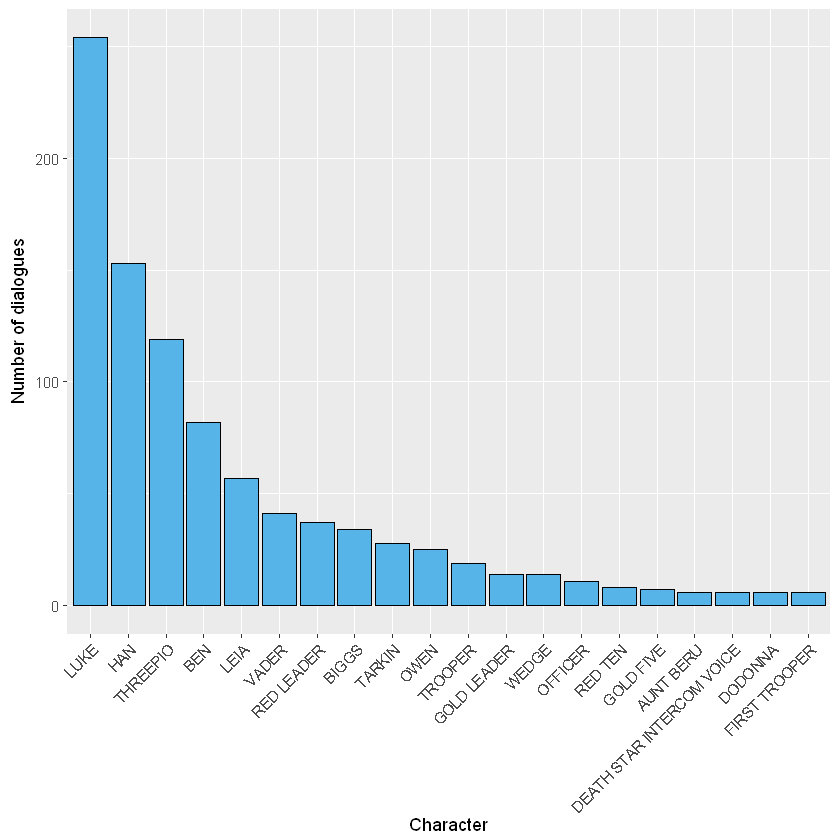

In [8]:
# Top 20 characters with more dialogues 
top.ep4.chars <- as.data.frame(sort(table(ep4$character), decreasing=TRUE))[1:20,]

# Visualization 
ggplot(data=top.ep4.chars, aes(x=Var1, y=Freq)) +
  geom_bar(stat="identity", fill="#56B4E9", colour="black") +
  theme(axis.text.x=element_text(angle=45, hjust=1)) +
  labs(x="Character", y="Number of dialogues")

HTML widgets cannot be represented in plain text (need html)
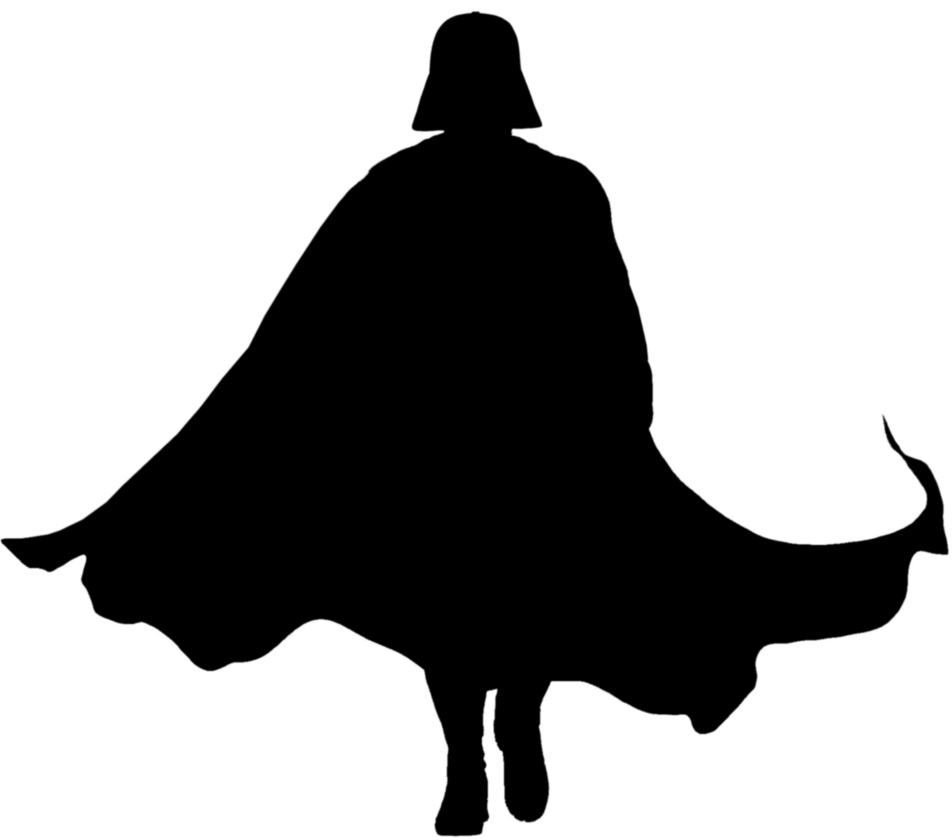

In [14]:
# Wordcloud for Episode IV
wordcloud2(frequentTerms(ep4$dialogue), size=0.5,
           figPath="vader.png")

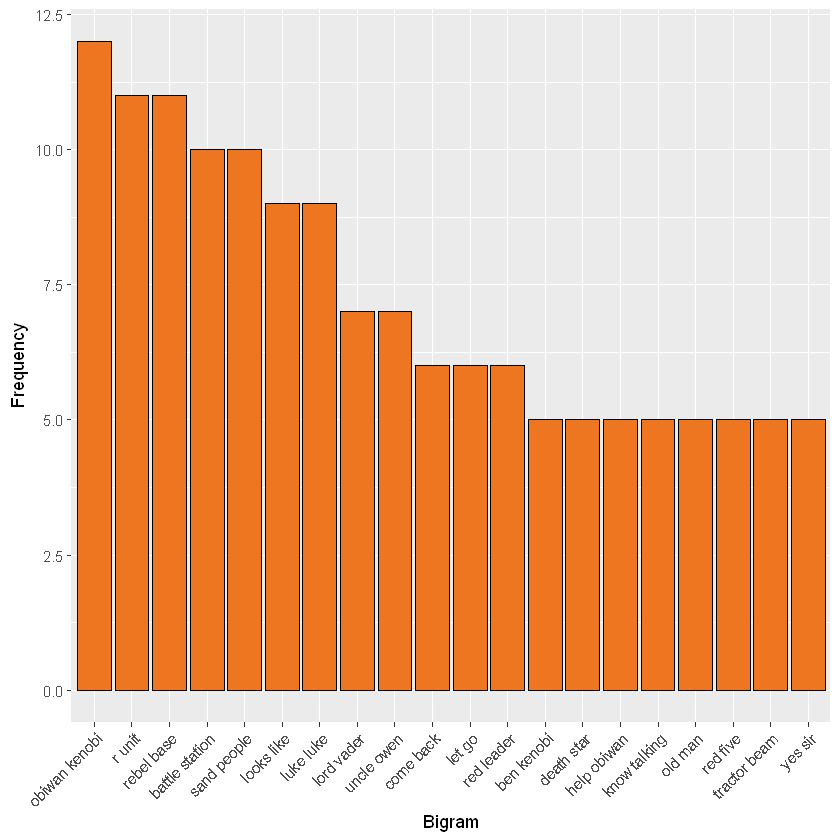

In [15]:
# Most frequent bigrams
ep4.bigrams <- frequentBigrams(ep4$dialogue)[1:20,]
ggplot(data=ep4.bigrams, aes(x=reorder(word, -freq), y=freq)) +  
  geom_bar(stat="identity", fill="chocolate2", colour="black") +
  theme(axis.text.x=element_text(angle=45, hjust=1)) +
  labs(x="Bigram", y="Frequency")

In [16]:
# How many dialogues?
length(ep5$dialogue)

[1] 839

In [17]:
# How many characters?
length(levels(ep5$character))

[1] 49

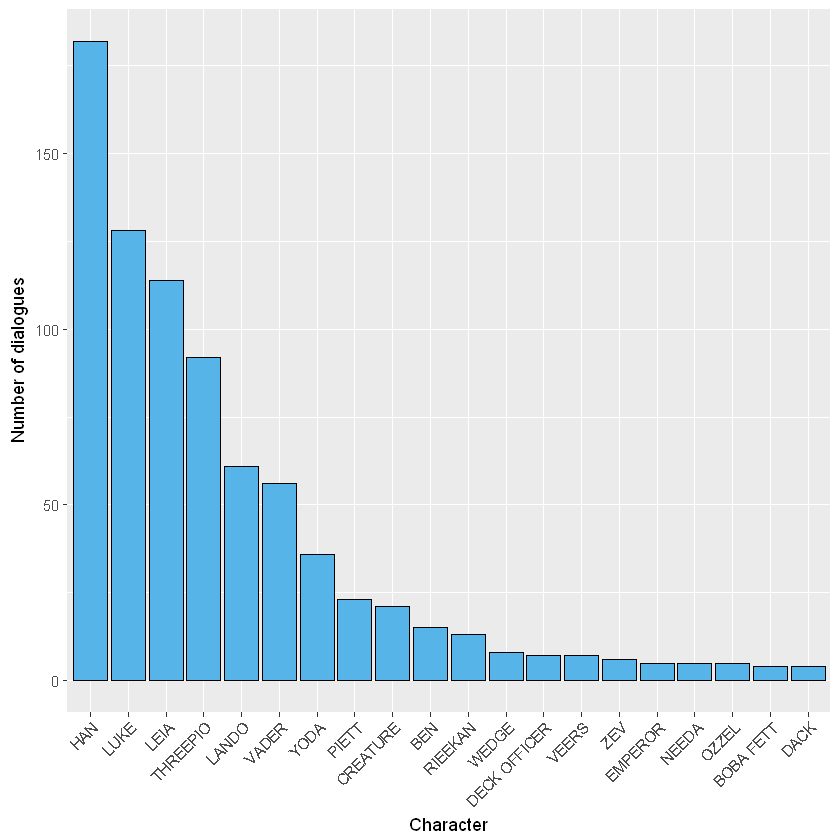

In [18]:
# Top 20 characters with more dialogues 
top.ep5.chars <- as.data.frame(sort(table(ep5$character), decreasing=TRUE))[1:20,]

# Visualization 
ggplot(data=top.ep5.chars, aes(x=Var1, y=Freq)) +
  geom_bar(stat="identity", fill="#56B4E9", colour="black") +
  theme(axis.text.x=element_text(angle=45, hjust=1)) +
  labs(x="Character", y="Number of dialogues")

HTML widgets cannot be represented in plain text (need html)
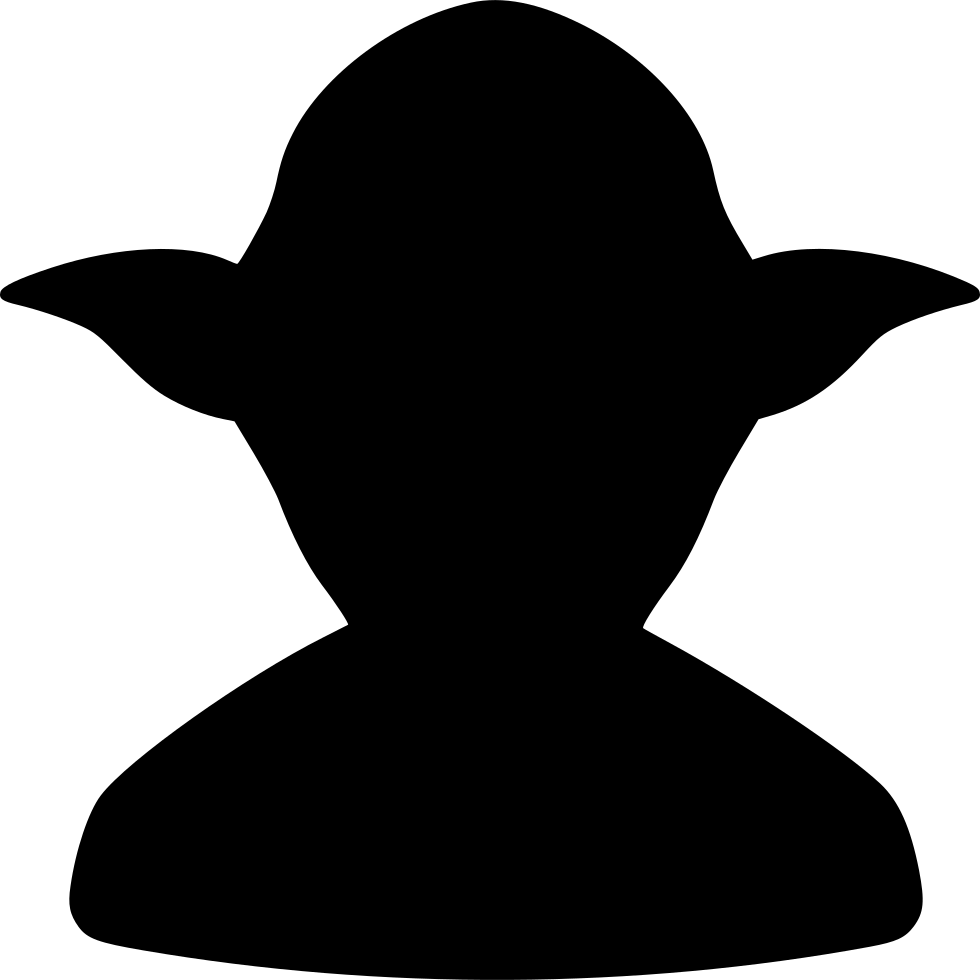

In [19]:
# Wordcloud for Episode V
wordcloud2(frequentTerms(ep5$dialogue), size=0.5,
           figPath="yoda.png")

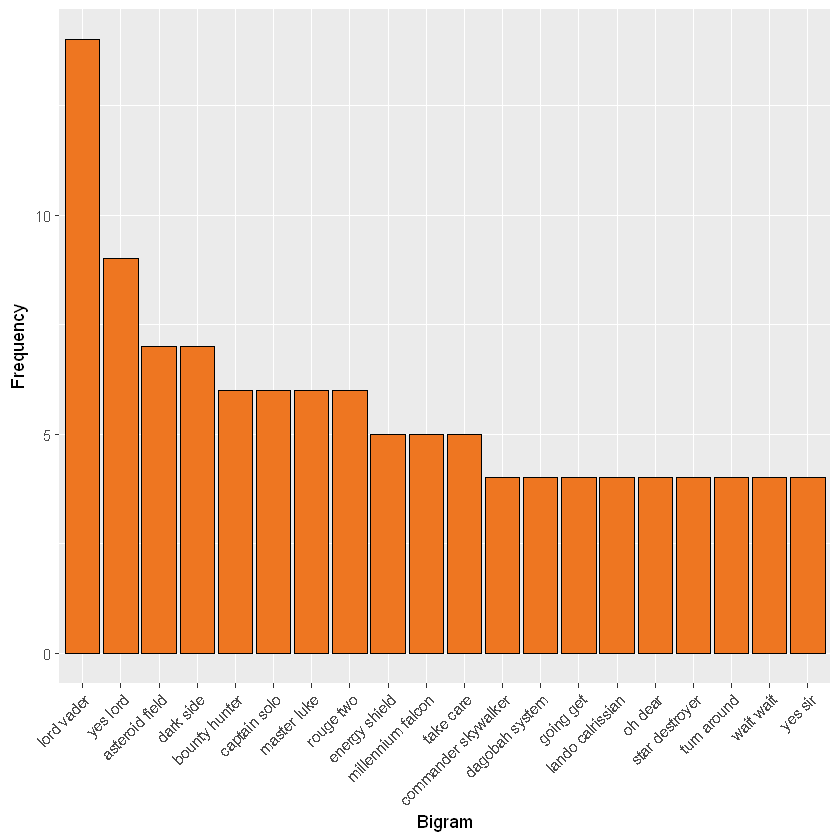

In [20]:
# Most frequent bigrams
ep5.bigrams <- frequentBigrams(ep5$dialogue)[1:20,]
ggplot(data=ep5.bigrams, aes(x=reorder(word, -freq), y=freq)) +  
  geom_bar(stat="identity", fill="chocolate2", colour="black") +
  theme(axis.text.x=element_text(angle=45, hjust=1)) +
  labs(x="Bigram", y="Frequency")

In [21]:
# How many dialogues?
length(ep6$dialogue)

[1] 674

In [22]:
# How many characters?
length(levels(ep6$character))

[1] 53

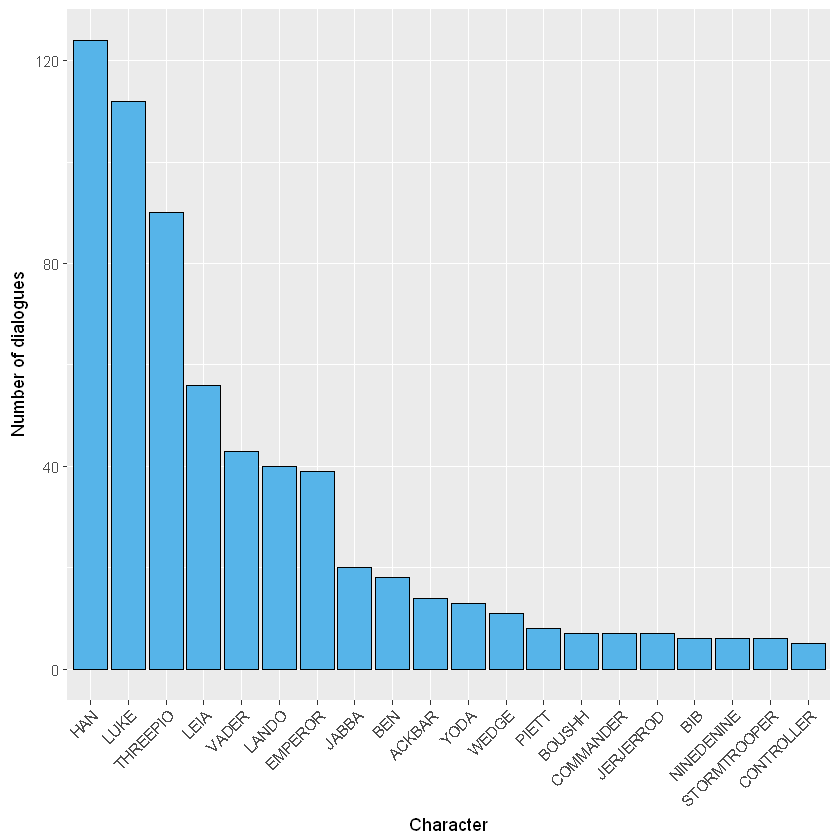

In [23]:
# Top 20 characters with more dialogues 
top.ep6.chars <- as.data.frame(sort(table(ep6$character), decreasing=TRUE))[1:20,]

# Visualization 
ggplot(data=top.ep6.chars, aes(x=Var1, y=Freq)) +
  geom_bar(stat="identity", fill="#56B4E9", colour="black") +
  theme(axis.text.x=element_text(angle=45, hjust=1)) +
  labs(x="Character", y="Number of dialogues")

HTML widgets cannot be represented in plain text (need html)
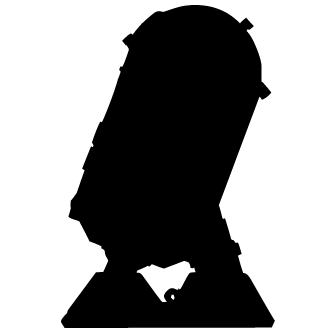

In [25]:
# Wordcloud for Episode VI
wordcloud2(frequentTerms(ep6$dialogue), size=0.5,
           figPath="r2d2.png")

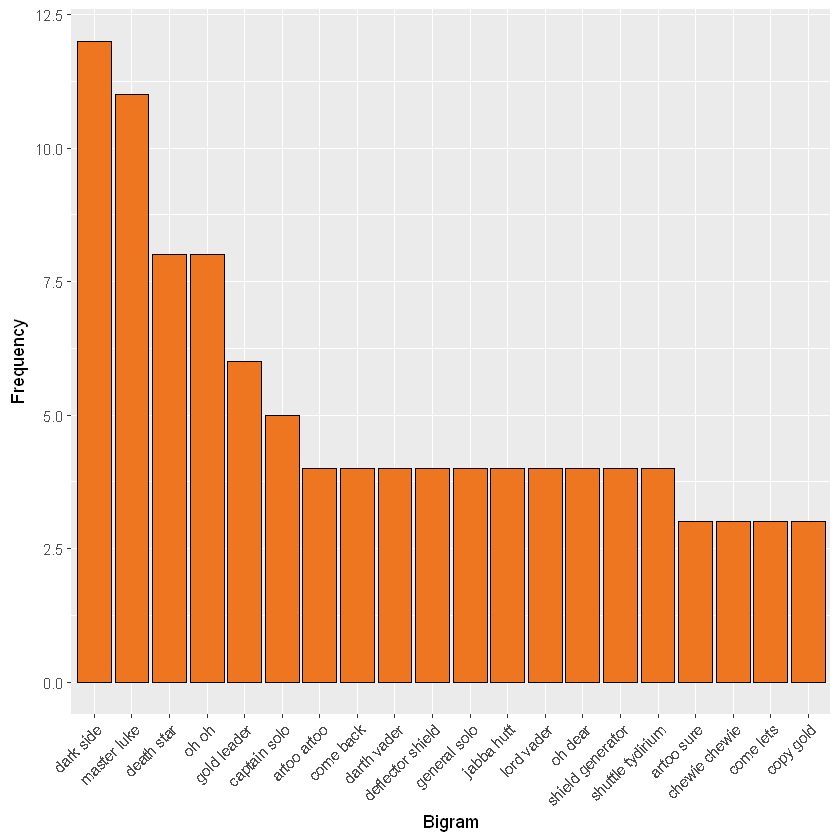

In [26]:
# Most frequent bigrams
ep6.bigrams <- frequentBigrams(ep6$dialogue)[1:20,]
ggplot(data=ep6.bigrams, aes(x=reorder(word, -freq), y=freq)) +  
  geom_bar(stat="identity", fill="chocolate2", colour="black") +
  theme(axis.text.x=element_text(angle=45, hjust=1)) +
  labs(x="Bigram", y="Frequency")

In [27]:
# The Original Trilogy dialogues 
trilogy <- rbind(ep4, ep5, ep6)

# How many dialogues?
length(trilogy$dialogue)

[1] 2523

In [28]:
# How many characters?
length(levels(trilogy$character))

[1] 129

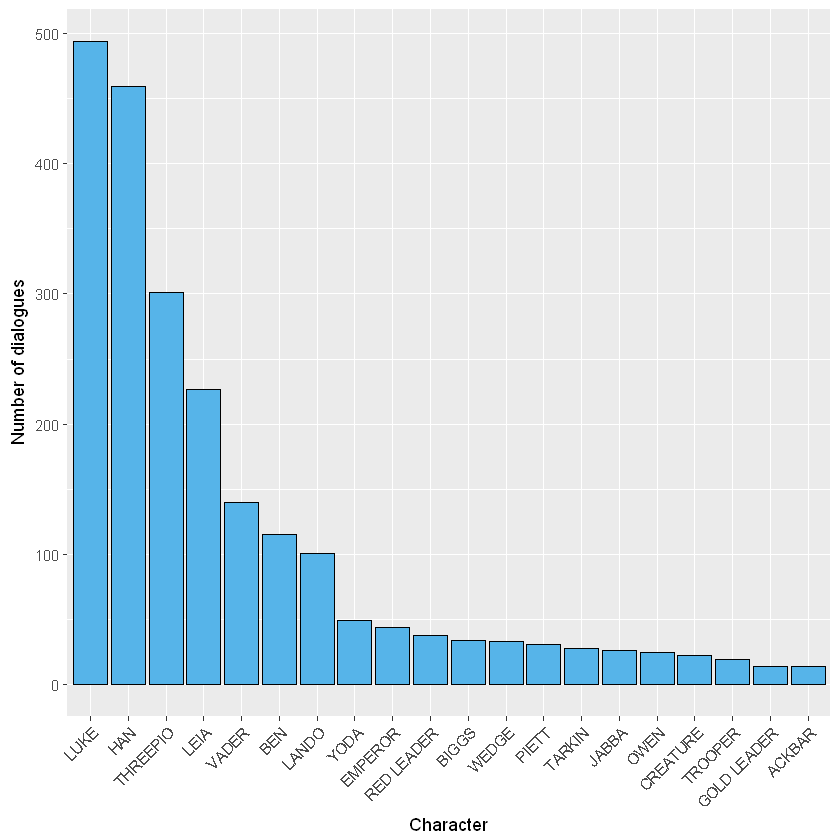

In [29]:
# Top 20 characters with more dialogues 
top.trilogy.chars <- as.data.frame(sort(table(trilogy$character), decreasing=TRUE))[1:20,]

# Visualization 
ggplot(data=top.trilogy.chars, aes(x=Var1, y=Freq)) +
  geom_bar(stat="identity", fill="#56B4E9", colour="black") +
  theme(axis.text.x=element_text(angle=45, hjust=1)) +
  labs(x="Character", y="Number of dialogues")

HTML widgets cannot be represented in plain text (need html)
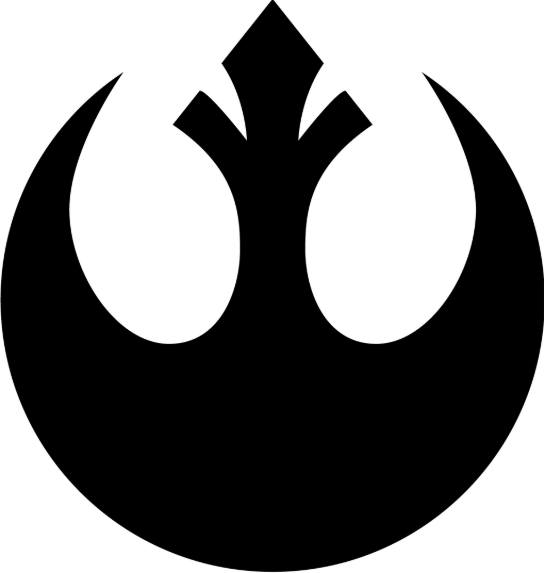

In [31]:
# Wordcloud for The Original Trilogy
wordcloud2(frequentTerms(trilogy$dialogue), size=0.4,
           figPath="rebel alliance.png")

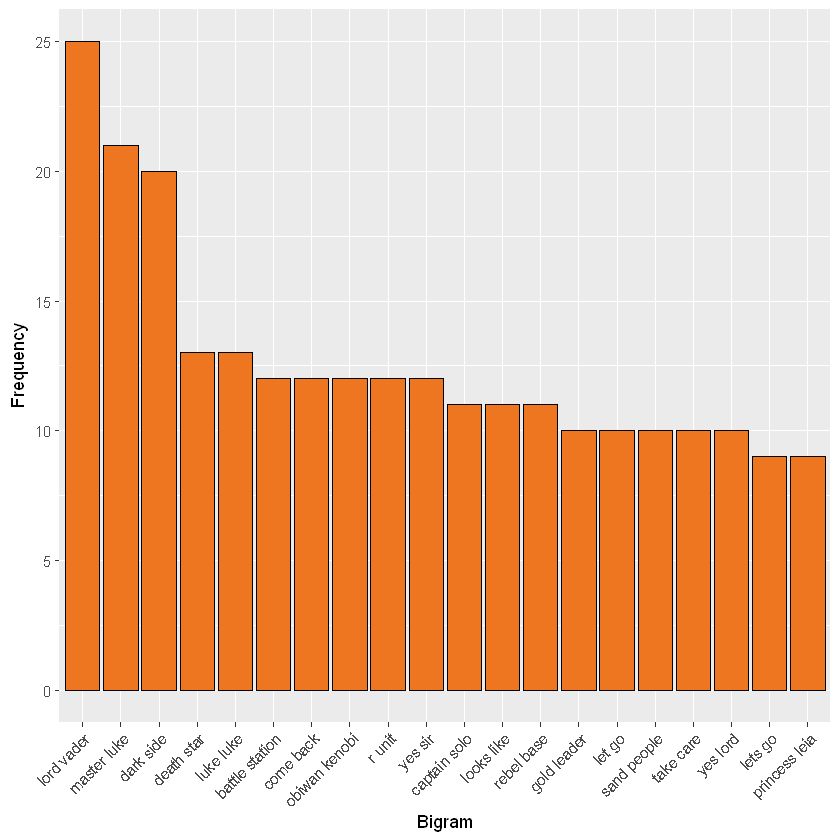

In [32]:
# Most frequent bigrams
trilogy.bigrams <- frequentBigrams(trilogy$dialogue)[1:20,]
ggplot(data=trilogy.bigrams, aes(x=reorder(word, -freq), y=freq)) +  
  geom_bar(stat="identity", fill="chocolate2", colour="black") +
  theme(axis.text.x=element_text(angle=45, hjust=1)) +
  labs(x="Bigram", y="Frequency")

In [33]:
# Transform the text to a tidy data structure with one token per row
tokens <- trilogy %>%  
  mutate(dialogue=as.character(trilogy$dialogue)) %>%
  unnest_tokens(word, dialogue)

Joining, by = "word"


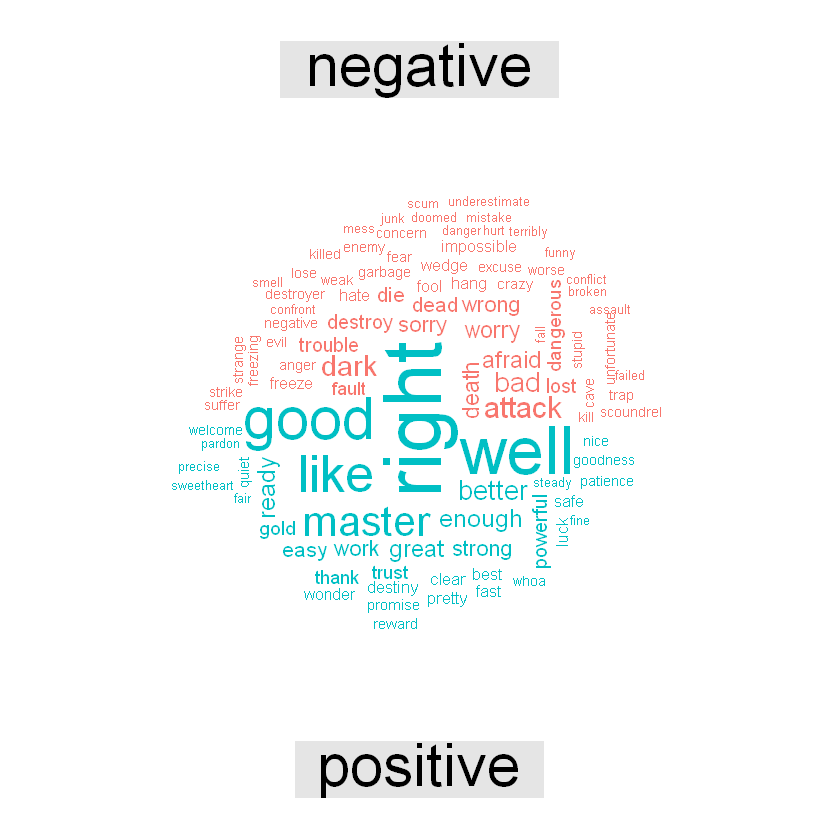

In [34]:
# Positive and negative words
tokens %>%
  inner_join(get_sentiments("bing")) %>%
  count(word, sentiment, sort=TRUE) %>%
  acast(word ~ sentiment, value.var="n", fill=0) %>%
  comparison.cloud(colors=c("#F8766D", "#00BFC4"), max.words=100)

Joining, by = "word"


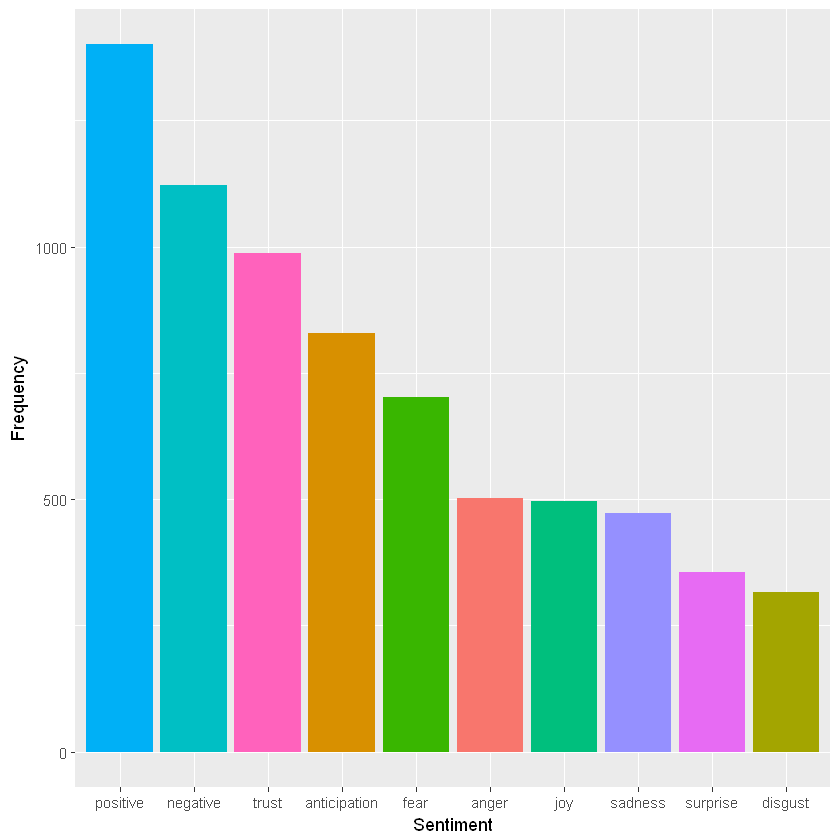

In [35]:
# Sentiments and frequency associated with each word  
sentiments <- tokens %>% 
  inner_join(get_sentiments("nrc")) %>%
  count(word, sentiment, sort=TRUE) 

# Frequency of each sentiment
ggplot(data=sentiments, aes(x=reorder(sentiment, -n, sum), y=n)) + 
geom_bar(stat="identity", aes(fill=sentiment), show.legend=FALSE) +
labs(x="Sentiment", y="Frequency")

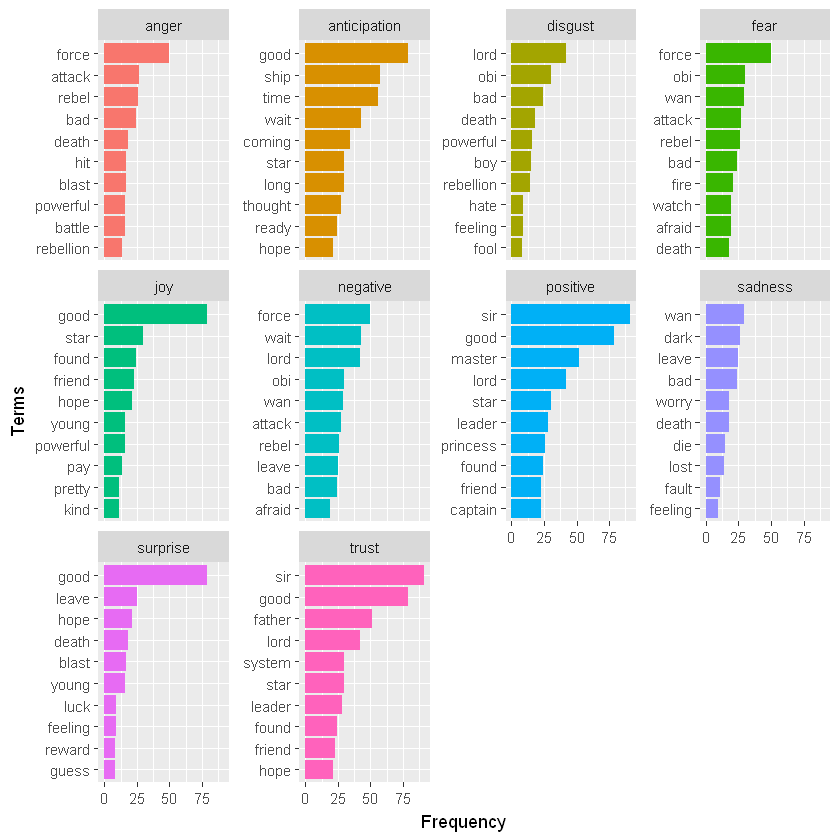

In [36]:
# Top 10 terms for each sentiment
sentiments %>%
  group_by(sentiment) %>%
  arrange(desc(n)) %>%
  slice(1:10) %>%
  ggplot(aes(x=reorder(word, n), y=n)) +
  geom_col(aes(fill=sentiment), show.legend=FALSE) +
  facet_wrap(~sentiment, scales="free_y") +
  labs(y="Frequency", x="Terms") +
  coord_flip() 

Joining, by = "word"


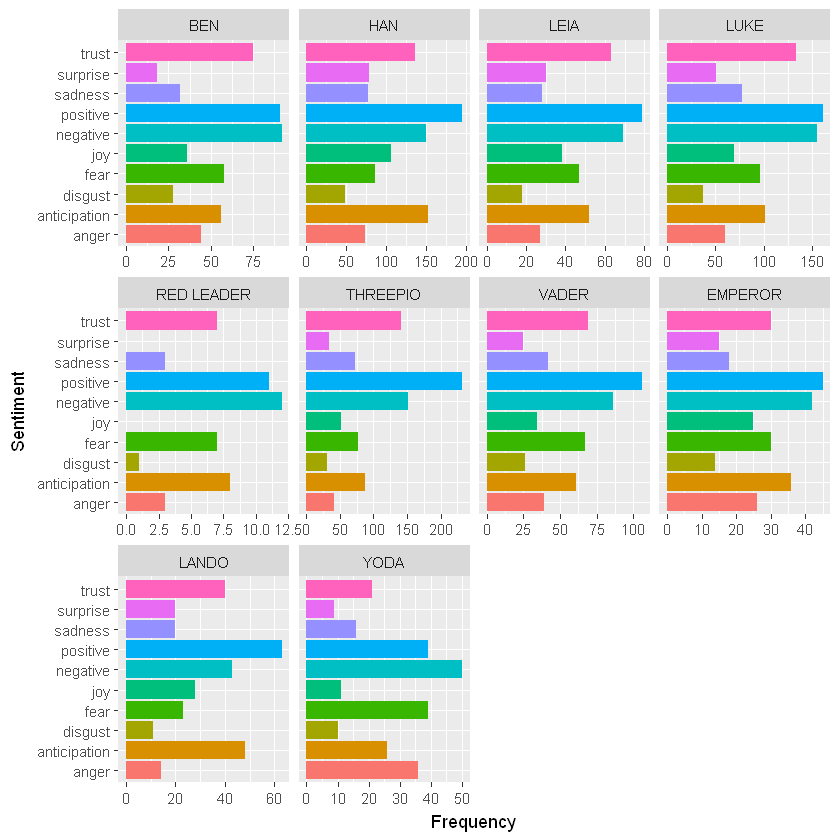

In [37]:
# Sentiment analysis for the Top 10 characters with more dialogues
tokens %>%
  filter(character %in% c("LUKE","HAN","THREEPIO","LEIA","VADER",
                          "BEN","LANDO","YODA","EMPEROR","RED LEADER")) %>%
  inner_join(get_sentiments("nrc")) %>%
  count(character, sentiment, sort=TRUE) %>%
  ggplot(aes(x=sentiment, y=n)) +
  geom_col(aes(fill=sentiment), show.legend=FALSE) +
  facet_wrap(~character, scales="free_x") +
  labs(x="Sentiment", y="Frequency") +
  coord_flip()

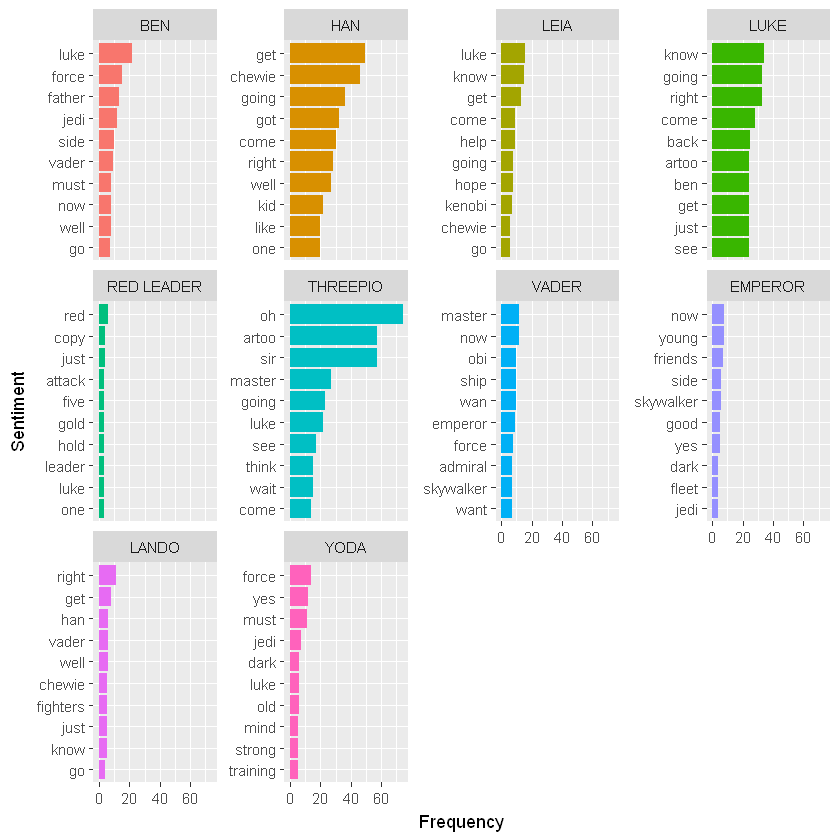

In [38]:
# Stopwords
mystopwords <- data_frame(word=c(stopwords("english"), 
                                 c("thats","weve","hes","theres","ive","im",
                                   "will","can","cant","dont","youve","us",
                                   "youre","youll","theyre","whats","didnt")))

# Tokens without stopwords
top.chars.tokens <- trilogy %>%
  mutate(dialogue=as.character(trilogy$dialogue)) %>%
  filter(character %in% c("LUKE","HAN","THREEPIO","LEIA","VADER",
                          "BEN","LANDO","YODA","EMPEROR","RED LEADER")) %>%
  unnest_tokens(word, dialogue) %>%
  anti_join(mystopwords, by="word")

# Most frequent words for each character
top.chars.tokens %>%
  count(character, word) %>%
  group_by(character) %>% 
  arrange(desc(n)) %>%
  slice(1:10) %>%
  ungroup() %>%
  mutate(word2=factor(paste(word, character, sep="__"), 
                       levels=rev(paste(word, character, sep="__"))))%>%
  ggplot(aes(x=word2, y=n)) +
  geom_col(aes(fill=character), show.legend=FALSE) +
  facet_wrap(~character, scales="free_y") +
  labs(x="Sentiment", y="Frequency") +
  scale_x_discrete(labels=function(x) gsub("__.+$", "", x)) +
  coord_flip()  

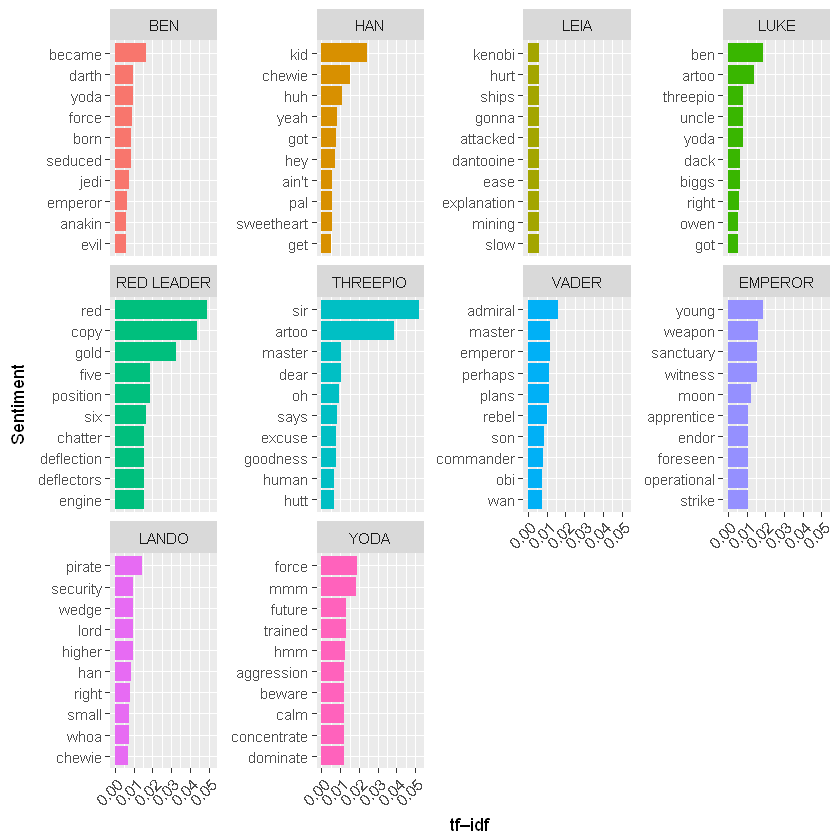

In [39]:
# Most relevant words for each character
top.chars.tokens %>%
  count(character, word) %>%
  bind_tf_idf(word, character, n) %>%
  group_by(character) %>% 
  arrange(desc(tf_idf)) %>%
  slice(1:10) %>%
  ungroup() %>%
  mutate(word2=factor(paste(word, character, sep="__"), 
                       levels=rev(paste(word, character, sep="__"))))%>%
  ggplot(aes(x=word2, y=tf_idf)) +
  geom_col(aes(fill=character), show.legend=FALSE) +
  facet_wrap(~character, scales="free_y") +
  theme(axis.text.x=element_text(angle=45, hjust=1)) +
  labs(y="tf–idf", x="Sentiment") +
  scale_x_discrete(labels=function(x) gsub("__.+$", "", x)) +
  coord_flip()